<b>In the case of image compression, PCA can be used to identify the most important features in an image and to reduce the number of bits required to represent the image. This can result in a significant reduction in file size, which can be especially important for images that are large or that need to be transmitted over slow networks.
In terms of increasing accuracy for different tasks, PCA can be useful for improving the performance of machine learning algorithms that are applied to images. For example, consider a task such as facial recognition. PCA can be used to extract the most important features of faces, such as the shape of the eyes, nose, and mouth, and to represent these features in a lower dimensional space. This can result in improved accuracy for facial recognition algorithms, as they will only have to process the most important information, rather than trying to process a large number of pixels in an image.</b>

In [1]:
import scipy.misc
import imageio
import os
import matplotlib.pyplot as plt
import numpy as np

def loadImages(dirName):
   

    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = imageio.v2.imread(os.path.join(root, file)) 
            face = np.resize(face,(128,128))
            face = face.reshape(128 * 128, ).tolist()          
            data.append(face)
            label.append(file.split('.')[1])                   
    return np.asarray(data) , label

In [2]:
df, label = loadImages('D:\ML\HW5\FACES')

In [3]:
X_test = df[:59,]
X_train = df[59:,]
y_test = np.array(label[0:59])
y_train = np.array(label[59:])

In [4]:
X_train_mean = np.mean(X_train, axis=0)
X_train = X_train - X_train_mean

X_test_mean = np.mean(X_test, axis=0)
X_test = X_test - X_test_mean

In [5]:
cov = np.cov(X_train.T)

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [7]:
eigenvectors = eigenvectors.T
indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[indices]

In [8]:
relative_eigenvalues = eigenvalues / np.sum(eigenvalues)

# Part A

<b>We use Eigen vectors that contribute less than a THRESHOLD value to the over all variance. In order to do this, we plot relative variance of different eigen values.</b>

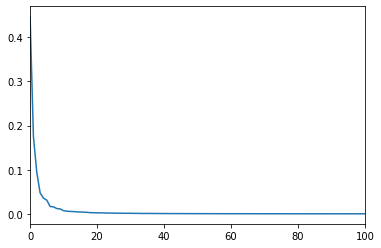

In [9]:
plt.xlim(0,100)
plt.plot(np.abs(relative_eigenvalues))

<b>By using the plot, we can se 20 is a good threshold. But we will use 100 for next part.</b>

In [11]:
eigenvectors = eigenvectors.astype('float64')

C:\Users\Milad\AppData\Local\Temp/ipykernel_11508/4270798564.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvectors = eigenvectors.astype('float64')


# Part B
<b>These pictures show that each eigen vector contains what information. Last ones
are mostly noise.</b>

### Eigenfaces with highest values

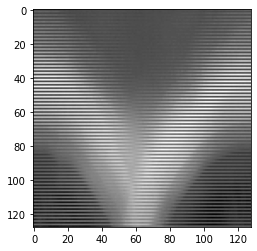

In [13]:
plt.imshow(eigenvectors[0].reshape(128, 128),'gray')

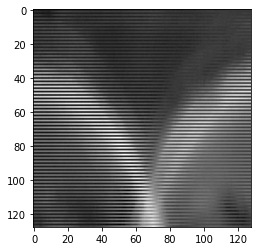

In [14]:
plt.imshow((eigenvectors)[1].reshape(128, 128),'gray')

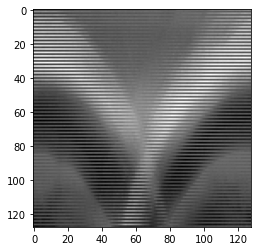

In [15]:
plt.imshow((eigenvectors)[2].reshape(128, 128),'gray')

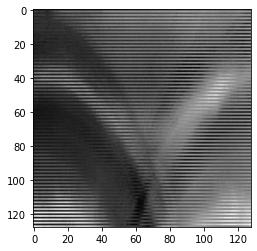

In [16]:
plt.imshow((eigenvectors)[3].reshape(128, 128),'gray')

<b>Eigenfaces with lowest values</b>

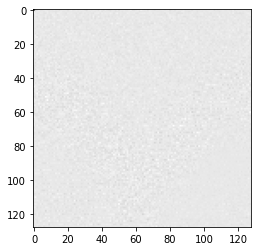

In [17]:
plt.imshow((eigenvectors)[-1].reshape(128, 128),'gray')

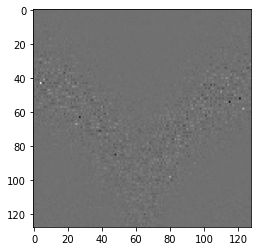

In [18]:
plt.imshow((eigenvectors)[-2].reshape(128, 128),'gray')

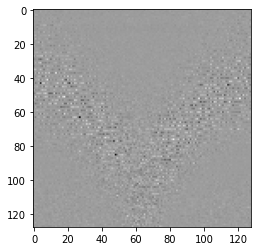

In [19]:
plt.imshow((eigenvectors)[-3].reshape(128, 128),'gray')

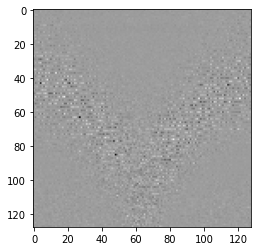

In [20]:
plt.imshow((eigenvectors)[-4].reshape(128, 128),'gray')

In [21]:
transformer = eigenvectors[0:100]
new_X_train = np.dot(X_train,transformer.T)
new_X_test = np.dot(X_test,transformer.T)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Part C

<b>It seems like reducing dimensions had no effect on the classification accuracy.</b>

### K=2

In [23]:
neigh_reduced = KNeighborsClassifier(n_neighbors=2)
neigh_reduced.fit(new_X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
y_pred_reduced = neigh_reduced.predict(new_X_test)
confusion_matrix(y_test,y_pred_reduced)

array([[ 0,  0,  0,  0,  0,  0],
       [ 4,  7,  0,  0,  0,  0],
       [ 2,  1,  6,  3,  0,  0],
       [ 2,  1,  0, 10,  2,  1],
       [ 2,  1,  0,  5,  2,  0],
       [ 0,  0,  1,  5,  2,  2]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred_reduced)

0.4576271186440678

### K=1

In [26]:
neigh_reduced = KNeighborsClassifier(n_neighbors=1)
neigh_reduced.fit(new_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred_reduced = neigh_reduced.predict(new_X_test)

In [28]:
confusion_matrix(y_test,y_pred_reduced)

array([[ 0,  0,  0,  0,  0,  0],
       [ 2,  7,  0,  1,  1,  0],
       [ 2,  0,  6,  1,  2,  1],
       [ 0,  0,  0, 11,  3,  2],
       [ 0,  2,  0,  3,  3,  2],
       [ 0,  0,  1,  3,  2,  4]], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred_reduced)

0.5254237288135594

### Not reduced, K=2

In [31]:
neigh_reduced = KNeighborsClassifier(n_neighbors=2)
neigh_reduced.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [32]:
y_pred = neigh_reduced.predict(X_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, 0, 0, 0],
       [4, 7, 0, 0, 0, 0],
       [2, 2, 6, 2, 0, 0],
       [3, 1, 0, 9, 2, 1],
       [2, 1, 0, 5, 2, 0],
       [0, 0, 1, 5, 2, 2]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred)

0.4406779661016949

### Not reduced, k=1

In [35]:
neigh_reduced = KNeighborsClassifier(n_neighbors=1)
neigh_reduced.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
y_pred = neigh_reduced.predict(X_test)

In [37]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0,  0,  0,  0,  0],
       [ 2,  7,  0,  1,  1,  0],
       [ 2,  0,  7,  1,  1,  1],
       [ 0,  0,  0, 10,  3,  3],
       [ 0,  2,  0,  3,  3,  2],
       [ 0,  0,  1,  3,  2,  4]], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred)

0.5254237288135594

# Part D

In [39]:
acc_scores = []
axis = []
for i in range(1,200,5):
    axis.append(i)
    transformer = eigenvectors[0:i]
    new_X_train = np.dot(X_train,transformer.T)
    new_X_test = np.dot(X_test,transformer.T)

    neigh_reduced = KNeighborsClassifier(n_neighbors=2)
    neigh_reduced.fit(new_X_train,y_train)

    y_pred_reduced = neigh_reduced.predict(new_X_test)

    acc = accuracy_score(y_test,y_pred_reduced)
    acc_scores.append(acc)

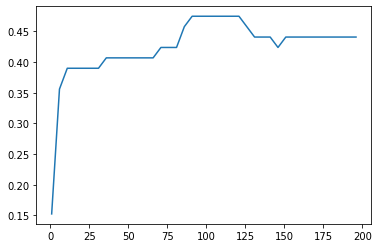

In [40]:
plt.plot(axis,acc_scores)

<b>Reducing Dimensions results in accuracy loss until a certain threshold, after that estimation error takes hold and after a point accuracy loss starts again.</b>